In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
from scipy.stats.mstats import gmean

In [2]:
# get input paths
test_set = "miplib3"
instance_fldr = os.path.join("test_sets", test_set)
results_fldr = os.path.join("results", test_set)
out_fldr = os.path.join("outputs", test_set)

## Check run failures

In [3]:
# running list of strings contained by different error codes
# last two are catchalls
err = {
    "walltime": [],
    "bad_alloc": [],
    "takeoffcuts": [],
    "solver is dual infeasible": [],
    "solver must be optimal": [],
    "segmentation fault": [],
    "no vpcs were made from a new disjunction": [],
    "farkas": [],
    "prlp is primal infeasible": [],  # put outstanding bugs below here
    "must have primalbound > root lp objective": [],
    "objective at parent node": [],
    "failed to optimize mip": [],
    "disjunction does not represent a full binary tree": [],
    "nonbasic reduced cost should be": [],
    "solver not proven optimal for node": [],
    "warning": []
}

# runs that errored out with new error code
other = []

# runs that had no errors
empty = []

# series that didn't run
no_go = []

# counts
count_series = 0
count_instances = 0

# iterate over all expected runs
for instance in os.listdir(instance_fldr):
    if not os.path.isdir(os.path.join(instance_fldr, instance)):
        continue
    for perturbation in os.listdir(os.path.join(instance_fldr, instance)):
        if not os.path.isdir(os.path.join(instance_fldr, instance, perturbation)):
            continue
        for terms in [4, 16, 64]:
            for generator in ["None", "New", "Old", "Farkas"]:

                # set variables for this iteration
                count_series += 1
                stem = f"{instance}_{perturbation}_{terms}_{generator}"
                file_pth = os.path.join(results_fldr, f"{stem}.err")
                series_fldr = os.path.join(instance_fldr, instance, perturbation)
                count_instances += len([f for f in os.listdir(series_fldr) if
                                        f.endswith(".mps")])

                # check if the series wasn't run
                if not os.path.exists(file_pth):
                    no_go.append(stem)
                
                # check if the series ran with no errors or warnings
                elif os.path.getsize(file_pth) == 0:
                    empty.append(stem)
                
                # track which error codes were thrown
                else:
                    # read the file
                    with open(file_pth, "r") as f:
                        text = f.read().lower()
                    
                    # assign the error file to the appropriate list
                    for code in err:
                        if code in text:
                            err[code].append(stem)
                            break
                    else:
                        other.append(stem)

In [4]:
# check which series didn't run
print(no_go)

[]


In [5]:
# get the proportion of series that at least got started
1 - (len(no_go) / count_series)

1.0

In [6]:
# out of time - rerun with more time if a lot of these
err["walltime"]

['10teams_bound_1_4_New',
 'modglob_objective_1_64_New',
 'modglob_matrix_0_64_New',
 'modglob_objective_0_64_New',
 'modglob_matrix_-1_64_New',
 'modglob_objective_-1_64_New',
 'p2756_objective_1_4_New',
 'p2756_objective_1_4_Old',
 'p2756_objective_1_16_New',
 'p2756_matrix_1_4_New',
 'p2756_matrix_1_16_New',
 'p2756_matrix_0_16_New',
 'p2756_objective_0_4_New',
 'p2756_objective_0_4_Old',
 'p2756_objective_0_16_New',
 'p2756_matrix_-1_16_New',
 'p2756_objective_-1_4_New',
 'p2756_objective_-1_4_Old',
 'p2756_objective_-1_16_New',
 'p2756_bound_1_4_New',
 'p2756_bound_1_16_New',
 'qnet1_o_matrix_0_16_New',
 'mod011_objective_1_4_New',
 'mod011_objective_1_4_Old',
 'mod011_objective_0_4_New',
 'mod011_objective_0_4_Old',
 'mod011_matrix_-1_4_New',
 'mod011_matrix_-1_4_Old',
 'mod011_objective_-1_4_New',
 'mod011_objective_-1_4_Old',
 'mas74_rhs_1_64_New',
 'mas74_rhs_-1_64_New',
 'qnet1_rhs_0_16_Old',
 'qnet1_matrix_1_16_New',
 'qnet1_matrix_0_4_New',
 'qnet1_matrix_0_16_New',
 'qnet1

In [7]:
# out of memory - rerun with more memory if a lot of these
err["bad_alloc"]

['10teams_matrix_1_4_Old',
 '10teams_matrix_1_4_Farkas',
 '10teams_matrix_0_4_Old',
 '10teams_matrix_0_4_Farkas',
 '10teams_objective_-1_4_Old',
 '10teams_objective_-1_4_Farkas',
 '10teams_bound_1_4_Old',
 '10teams_bound_1_4_Farkas',
 'p2756_objective_1_4_Farkas',
 'p2756_objective_1_16_Old',
 'p2756_objective_1_16_Farkas',
 'p2756_matrix_1_4_Farkas',
 'p2756_matrix_1_16_Old',
 'p2756_matrix_1_16_Farkas',
 'p2756_matrix_0_4_Farkas',
 'p2756_matrix_0_16_Old',
 'p2756_matrix_0_16_Farkas',
 'p2756_objective_0_4_Farkas',
 'p2756_objective_0_16_Old',
 'p2756_objective_0_16_Farkas',
 'p2756_rhs_-1_16_Old',
 'p2756_rhs_-1_16_Farkas',
 'p2756_matrix_-1_4_Farkas',
 'p2756_matrix_-1_16_Old',
 'p2756_matrix_-1_16_Farkas',
 'p2756_objective_-1_4_Farkas',
 'p2756_objective_-1_16_Old',
 'p2756_objective_-1_16_Farkas',
 'p2756_bound_1_4_Old',
 'p2756_bound_1_4_Farkas',
 'p2756_bound_1_16_Old',
 'p2756_bound_1_16_Farkas',
 'gesa2_o_objective_1_64_Old',
 'gesa2_o_objective_1_64_Farkas',
 'gesa2_o_objec

In [8]:
# this is an issue with John's bookkeeping - not much we can do here
err["takeoffcuts"]

['blend2_objective_1_4_New',
 'blend2_objective_1_16_Old',
 'blend2_objective_1_16_Farkas',
 'blend2_rhs_-1_4_Old',
 'blend2_matrix_-1_16_Old',
 'egout_matrix_0_4_New',
 'egout_matrix_0_4_Farkas',
 'egout_matrix_0_16_New',
 'egout_matrix_0_16_Old',
 'egout_matrix_0_16_Farkas',
 'egout_matrix_0_64_New',
 'egout_matrix_0_64_Old',
 'egout_matrix_0_64_Farkas',
 'l152lav_rhs_-1_4_Farkas',
 'bell5_rhs_0_4_New',
 'bell5_rhs_0_4_Old',
 'bell5_rhs_0_4_Farkas',
 'bell5_objective_1_4_New',
 'bell5_objective_1_4_Old',
 'bell5_objective_1_4_Farkas',
 'bell5_matrix_1_4_New',
 'bell5_matrix_1_4_Old',
 'bell5_matrix_1_4_Farkas',
 'bell5_matrix_0_4_New',
 'bell5_matrix_0_4_Old',
 'bell5_matrix_0_4_Farkas',
 'bell5_objective_0_4_New',
 'bell5_objective_0_4_Old',
 'bell5_objective_0_4_Farkas',
 'bell5_rhs_-1_4_New',
 'bell5_rhs_-1_4_Old',
 'bell5_rhs_-1_4_Farkas',
 'bell5_matrix_-1_4_New',
 'bell5_matrix_-1_4_Old',
 'bell5_matrix_-1_4_Farkas',
 'bell5_objective_-1_4_New',
 'bell5_objective_-1_4_Old',
 'b

In [9]:
err["solver is dual infeasible"]

[]

In [10]:
# these are usually issues with CLP finding optimality - not much we can do here
err["solver must be optimal"]

['qnet1_o_bound_1_4_New',
 'qnet1_o_bound_1_4_Old',
 'qnet1_o_bound_1_4_Farkas',
 'qnet1_o_bound_1_16_New',
 'qnet1_o_bound_1_16_Old',
 'qnet1_o_bound_1_16_Farkas',
 'qnet1_bound_1_4_New',
 'qnet1_bound_1_4_Old',
 'qnet1_bound_1_4_Farkas',
 'qnet1_bound_1_16_New',
 'qnet1_bound_1_16_Old',
 'qnet1_bound_1_16_Farkas',
 'pp08aCUTS_objective_1_4_New',
 'pp08aCUTS_objective_1_4_Old',
 'pp08aCUTS_objective_1_4_Farkas',
 'pp08aCUTS_objective_1_16_New',
 'pp08aCUTS_objective_1_16_Old',
 'pp08aCUTS_objective_1_16_Farkas',
 'pp08aCUTS_objective_1_64_New',
 'pp08aCUTS_objective_1_64_Old',
 'pp08aCUTS_objective_1_64_Farkas',
 'pp08aCUTS_objective_0_4_New',
 'pp08aCUTS_objective_0_4_Old',
 'pp08aCUTS_objective_0_4_Farkas',
 'pp08aCUTS_objective_0_16_New',
 'pp08aCUTS_objective_0_16_Old',
 'pp08aCUTS_objective_0_16_Farkas',
 'pp08aCUTS_objective_0_64_New',
 'pp08aCUTS_objective_0_64_Old',
 'pp08aCUTS_objective_0_64_Farkas',
 'pp08a_objective_1_4_New',
 'pp08a_objective_1_4_Old',
 'pp08a_objective_1_

In [11]:
err["segmentation fault"]

['mod010_objective_-1_4_New', 'l152lav_rhs_-1_4_New', 'rgn_matrix_1_64_New']

In [75]:
# these should all be from the problem being too big and hitting the time limit
# or integer solutions
# len(err["no vpcs were made from a new disjunction"]) / count_series  15%
err["no vpcs were made from a new disjunction"]

['10teams_objective_1_16_New',
 '10teams_objective_1_16_Old',
 '10teams_objective_1_16_Farkas',
 '10teams_objective_1_64_New',
 '10teams_objective_1_64_Old',
 '10teams_objective_1_64_Farkas',
 '10teams_matrix_1_16_New',
 '10teams_matrix_1_16_Old',
 '10teams_matrix_1_16_Farkas',
 '10teams_matrix_1_64_New',
 '10teams_matrix_1_64_Old',
 '10teams_matrix_1_64_Farkas',
 '10teams_matrix_0_16_New',
 '10teams_matrix_0_16_Old',
 '10teams_matrix_0_16_Farkas',
 '10teams_matrix_0_64_New',
 '10teams_matrix_0_64_Old',
 '10teams_matrix_0_64_Farkas',
 '10teams_objective_-1_16_New',
 '10teams_objective_-1_16_Old',
 '10teams_objective_-1_16_Farkas',
 '10teams_objective_-1_64_New',
 '10teams_objective_-1_64_Old',
 '10teams_objective_-1_64_Farkas',
 '10teams_bound_1_16_New',
 '10teams_bound_1_16_Old',
 '10teams_bound_1_16_Farkas',
 '10teams_bound_1_64_New',
 '10teams_bound_1_64_Old',
 '10teams_bound_1_64_Farkas',
 'p2756_rhs_0_64_New',
 'p2756_rhs_0_64_Old',
 'p2756_rhs_0_64_Farkas',
 'p2756_objective_1_64

In [13]:
# this may be a bug in my code - track down if a lot
err["farkas"]

['10teams_objective_1_4_New',
 'blend2_matrix_0_4_New',
 'blend2_matrix_0_16_New',
 'blend2_matrix_-1_4_New',
 'blend2_matrix_-1_16_New',
 'qnet1_o_matrix_0_4_New',
 'mod011_objective_1_4_Farkas',
 'mod011_matrix_1_4_Farkas',
 'mod011_matrix_0_4_Farkas',
 'mod011_objective_0_4_Farkas',
 'mod011_matrix_-1_4_Farkas',
 'mod011_objective_-1_4_Farkas',
 'qnet1_matrix_1_4_New',
 'lseu_matrix_1_16_New',
 'lseu_matrix_0_64_New',
 'fixnet6_objective_1_64_New',
 'fixnet6_matrix_1_4_New',
 'fixnet6_matrix_1_16_New',
 'fixnet6_matrix_1_64_New',
 'fixnet6_matrix_0_4_New',
 'fixnet6_matrix_0_64_New',
 'fixnet6_matrix_-1_4_New',
 'fixnet6_matrix_-1_16_New',
 'fixnet6_matrix_-1_64_New',
 'pp08aCUTS_matrix_-1_16_New',
 'rout_matrix_0_4_New',
 'rout_matrix_-1_4_New',
 'qiu_objective_1_4_New',
 'qiu_matrix_0_4_New',
 'qiu_objective_0_4_New',
 'qiu_objective_-1_4_New',
 'rgn_matrix_0_64_New',
 'set1ch_rhs_-1_64_New',
 'p0282_objective_0_16_New',
 'p0282_matrix_-1_64_New',
 'misc07_matrix_-1_16_New']

In [14]:
# this shouldn't be an issue - effected runs just get skipped
err["prlp is primal infeasible"]

['blend2_matrix_1_4_Old',
 'blend2_matrix_1_16_Old',
 'blend2_matrix_0_4_Old',
 'blend2_matrix_0_16_Old',
 'blend2_matrix_-1_4_Old',
 'modglob_matrix_1_4_Old',
 'modglob_matrix_1_16_Old',
 'modglob_matrix_1_64_Old',
 'modglob_matrix_0_4_Old',
 'modglob_matrix_0_16_Old',
 'modglob_matrix_0_64_Old',
 'modglob_matrix_-1_4_Old',
 'modglob_matrix_-1_16_Old',
 'modglob_matrix_-1_64_Old',
 'p2756_matrix_1_4_Old',
 'p2756_matrix_0_4_New',
 'p2756_matrix_0_4_Old',
 'p2756_matrix_-1_4_New',
 'p2756_matrix_-1_4_Old',
 'qnet1_o_matrix_1_4_Old',
 'qnet1_o_matrix_1_16_Old',
 'qnet1_o_matrix_0_4_Old',
 'mod011_matrix_1_4_Old',
 'mod011_matrix_0_4_Old',
 'mas74_rhs_0_4_New',
 'mas74_rhs_0_4_Old',
 'mas74_rhs_0_16_New',
 'mas74_rhs_0_16_Old',
 'mas74_rhs_0_64_New',
 'mas74_rhs_0_64_Old',
 'mas74_matrix_1_4_New',
 'mas74_matrix_1_4_Old',
 'mas74_matrix_1_16_New',
 'mas74_matrix_1_16_Old',
 'mas74_matrix_1_64_New',
 'mas74_matrix_1_64_Old',
 'mas74_matrix_0_4_New',
 'mas74_matrix_0_4_Old',
 'mas74_matrix

In [15]:
err["warning"]

['modglob_matrix_1_64_New',
 'modglob_matrix_0_16_New',
 'modglob_matrix_-1_16_New',
 'mod011_matrix_0_4_New',
 'mod010_rhs_1_4_New',
 'lseu_matrix_1_64_New',
 'pp08aCUTS_rhs_1_64_New',
 'l152lav_all_1_16_New',
 'p0033_rhs_0_16_New',
 'p0033_matrix_0_16_New',
 'harp2_objective_1_4_Old',
 'harp2_objective_1_4_Farkas',
 'harp2_matrix_1_4_New',
 'harp2_matrix_1_4_Farkas',
 'harp2_matrix_0_4_Farkas',
 'harp2_objective_0_4_Old',
 'harp2_objective_0_4_Farkas',
 'harp2_matrix_-1_4_Farkas',
 'harp2_objective_-1_4_Old',
 'harp2_objective_-1_4_Farkas',
 'harp2_bound_1_4_New',
 'harp2_bound_1_4_Old',
 'harp2_bound_1_4_Farkas',
 'dcmulti_matrix_1_4_New',
 'dcmulti_matrix_1_16_New',
 'dcmulti_matrix_1_64_New',
 'dcmulti_matrix_0_4_New',
 'dcmulti_matrix_0_16_New',
 'dcmulti_matrix_0_64_New',
 'dcmulti_matrix_-1_16_New',
 'dcmulti_matrix_-1_64_New',
 'fiber_objective_0_4_New',
 'gt2_matrix_1_4_New',
 'gt2_matrix_0_4_New',
 'qiu_rhs_0_4_New',
 'qiu_rhs_0_4_Old',
 'qiu_rhs_0_4_Farkas',
 'qiu_objective

In [16]:
# issue was not optimizing solver before checking LP relaxation objective vs primal bound
err["must have primalbound > root lp objective"]

['set1ch_objective_1_4_None',
 'set1ch_objective_1_4_New',
 'set1ch_objective_1_4_Old',
 'set1ch_objective_1_4_Farkas',
 'set1ch_objective_1_16_None',
 'set1ch_objective_1_16_New',
 'set1ch_objective_1_16_Old',
 'set1ch_objective_1_16_Farkas',
 'set1ch_objective_1_64_None',
 'set1ch_objective_1_64_New',
 'set1ch_objective_1_64_Old',
 'set1ch_objective_1_64_Farkas']

In [17]:
# LP relxation objective is not going to match root node objective when warm starting 
err["objective at parent node"]

[]

In [70]:
# not enough tolerance added to bound (or we hit time limit)
# todo handle this gracefully
# len(err["failed to optimize mip"]) / count_series  10%
err["failed to optimize mip"]

['qnet1_o_matrix_1_16_Farkas',
 'qnet1_o_matrix_0_16_Old',
 'qnet1_o_matrix_0_16_Farkas',
 'qnet1_o_matrix_-1_16_New',
 'qnet1_o_matrix_-1_16_Old',
 'mod011_matrix_1_4_None',
 'mod011_matrix_1_4_New',
 'mod011_matrix_1_16_None',
 'mod011_matrix_1_64_None',
 'rentacar_objective_1_4_None',
 'rentacar_objective_1_4_New',
 'rentacar_objective_1_4_Old',
 'rentacar_objective_1_4_Farkas',
 'rentacar_objective_1_16_None',
 'rentacar_objective_1_16_New',
 'rentacar_objective_1_16_Old',
 'rentacar_objective_1_16_Farkas',
 'rentacar_objective_1_64_None',
 'rentacar_objective_1_64_New',
 'rentacar_objective_1_64_Old',
 'rentacar_objective_1_64_Farkas',
 'rentacar_objective_0_4_None',
 'rentacar_objective_0_4_New',
 'rentacar_objective_0_4_Old',
 'rentacar_objective_0_4_Farkas',
 'rentacar_objective_0_16_None',
 'rentacar_objective_0_16_New',
 'rentacar_objective_0_16_Old',
 'rentacar_objective_0_16_Farkas',
 'rentacar_objective_0_64_None',
 'rentacar_objective_0_64_New',
 'rentacar_objective_0_64_

In [72]:
# todo: figure out why
# len(err["disjunction does not represent a full binary tree"]) / count_series  6%
err["disjunction does not represent a full binary tree"]

['blend2_rhs_0_64_New',
 'blend2_rhs_0_64_Old',
 'blend2_rhs_0_64_Farkas',
 'blend2_objective_1_16_New',
 'blend2_objective_1_64_New',
 'blend2_objective_1_64_Old',
 'blend2_objective_1_64_Farkas',
 'blend2_matrix_1_64_New',
 'blend2_matrix_1_64_Old',
 'blend2_matrix_1_64_Farkas',
 'blend2_matrix_0_64_New',
 'blend2_matrix_0_64_Old',
 'blend2_matrix_0_64_Farkas',
 'blend2_rhs_-1_64_New',
 'blend2_rhs_-1_64_Old',
 'blend2_rhs_-1_64_Farkas',
 'blend2_matrix_-1_64_New',
 'blend2_matrix_-1_64_Old',
 'blend2_matrix_-1_64_Farkas',
 'rout_matrix_1_16_New',
 'rout_matrix_0_16_New',
 'rout_matrix_-1_16_New',
 'gen_objective_1_16_New',
 'gen_objective_1_16_Old',
 'gen_objective_1_16_Farkas',
 'gen_objective_1_64_New',
 'gen_objective_1_64_Old',
 'gen_objective_1_64_Farkas',
 'gen_objective_0_16_New',
 'gen_objective_0_16_Old',
 'gen_objective_0_16_Farkas',
 'gen_objective_0_64_New',
 'gen_objective_0_64_Old',
 'gen_objective_0_64_Farkas',
 'gen_objective_-1_16_New',
 'gen_objective_-1_16_Old',
 

In [20]:
# this and next issue I think are because we run out of time creating tree leading to errors
# todo: handle gracefully 
err["nonbasic reduced cost should be"]

['mod010_all_1_4_New',
 'rout_matrix_-1_4_Old',
 'l152lav_rhs_1_4_New',
 'l152lav_rhs_1_4_Old',
 'l152lav_rhs_1_16_New',
 'l152lav_rhs_-1_4_Old',
 'air04_objective_1_4_New',
 'air04_objective_1_4_Old',
 'air04_objective_1_4_Farkas',
 'air04_matrix_1_4_New',
 'air04_matrix_1_4_Old',
 'air04_matrix_1_4_Farkas',
 'air04_matrix_0_4_New',
 'air04_matrix_0_4_Old',
 'air04_matrix_0_4_Farkas',
 'air04_objective_0_4_New',
 'air04_objective_0_4_Old',
 'air04_objective_0_4_Farkas',
 'air04_matrix_-1_4_New',
 'air04_matrix_-1_4_Old',
 'air04_matrix_-1_4_Farkas',
 'air04_objective_-1_4_New',
 'air04_objective_-1_4_Old',
 'air04_objective_-1_4_Farkas',
 'air04_bound_0_4_New',
 'air04_bound_0_4_Old',
 'air04_bound_0_4_Farkas',
 'air04_bound_1_4_New',
 'air04_bound_1_4_Old',
 'air04_bound_1_4_Farkas',
 'air05_objective_1_4_New',
 'air05_objective_1_4_Old',
 'air05_objective_1_4_Farkas',
 'air05_matrix_1_4_New',
 'air05_matrix_1_4_Old',
 'air05_matrix_1_4_Farkas',
 'air05_matrix_0_4_New',
 'air05_matri

In [21]:
# again issue with not getting through vpc generation in time
# todo: handle this gracefully
err["solver not proven optimal for node"]

['air04_objective_1_16_New',
 'air04_objective_1_16_Old',
 'air04_objective_1_16_Farkas',
 'air04_objective_1_64_New',
 'air04_objective_1_64_Old',
 'air04_objective_1_64_Farkas',
 'air04_matrix_1_16_New',
 'air04_matrix_1_16_Old',
 'air04_matrix_1_16_Farkas',
 'air04_matrix_1_64_New',
 'air04_matrix_1_64_Old',
 'air04_matrix_1_64_Farkas',
 'air04_matrix_0_16_New',
 'air04_matrix_0_16_Old',
 'air04_matrix_0_16_Farkas',
 'air04_matrix_0_64_New',
 'air04_matrix_0_64_Old',
 'air04_matrix_0_64_Farkas',
 'air04_objective_0_16_New',
 'air04_objective_0_16_Old',
 'air04_objective_0_16_Farkas',
 'air04_objective_0_64_New',
 'air04_objective_0_64_Old',
 'air04_objective_0_64_Farkas',
 'air04_matrix_-1_16_New',
 'air04_matrix_-1_16_Old',
 'air04_matrix_-1_16_Farkas',
 'air04_matrix_-1_64_New',
 'air04_matrix_-1_64_Old',
 'air04_matrix_-1_64_Farkas',
 'air04_objective_-1_16_New',
 'air04_objective_-1_16_Old',
 'air04_objective_-1_16_Farkas',
 'air04_objective_-1_64_New',
 'air04_objective_-1_64_O

In [22]:
# errors unaccounted for
other

['p0201_rhs_0_64_New',
 'p0201_objective_1_64_New',
 'p0201_matrix_0_64_New',
 'p0201_objective_0_64_New',
 'p0201_matrix_-1_64_New',
 'p0201_objective_-1_64_New',
 'pk1_rhs_1_4_None',
 'pk1_rhs_1_16_None',
 'pk1_rhs_1_64_None']

In [23]:
# proportion of series that had no critical issues
len(empty + err["warning"] + err["prlp is primal infeasible"] + err["walltime"]) / count_series

0.5441176470588235

In [68]:
# proportion of series that had no critical issues/issues we can't control
for generator in ["None", "New", "Old", "Farkas"]:
    g = [s for s in empty + err["warning"] + err["prlp is primal infeasible"] +
         err["walltime"] + err["bad_alloc"] + err["solver not proven optimal for node"] +
         err["nonbasic reduced cost should be"] + err["solver must be optimal"] +
         err["takeoffcuts"] + err["no vpcs were made from a new disjunction"]
         if s.endswith(generator)]
    print(f"{generator}: {4 * len(g) / count_series}")

None: 0.8699690402476781
New: 0.5531475748194015
Old: 0.6016511867905057
Farkas: 0.5954592363261094


In [25]:
# proportion of series that were improperly provisioned
(len(err["bad_alloc"] + err["walltime"])) / count_series

0.08152734778121776

## Read in data

In [26]:
# map generator names to the corresponding data frames
df_map = {
    "None": pd.DataFrame(),
    "Farkas": pd.DataFrame(),
    "New": pd.DataFrame(),
    "Old": pd.DataFrame()
}
gap_map = {
    "None": pd.DataFrame(),
    "Farkas": pd.DataFrame(),
    "New": pd.DataFrame(),
    "Old": pd.DataFrame()
}
regex = re.compile(r'([a-zA-Z0-9-]+)_([a-z]+)_([0-9-]+)_([0-9]+)_([a-zA-Z ]+)')

# declaring types as needed
column_types = {'primalBound': float}

# iterate over all files in the folder
for file_name in os.listdir(results_fldr):
    
    file_pth = os.path.join(results_fldr, file_name)
    
    # if the file is not a nonempty csv, skip it
    if not file_name.endswith(".csv") or os.path.getsize(file_pth) == 0:
        continue
    
    # get the experimental set up
    match = regex.search(file_name)
    instance_name = match.group(1)
    perturbation = match.group(2)
    degree = 2**int(match.group(3))
    terms = int(match.group(4))
    generator = match.group(5)
    
    # read the file
    df = pd.read_csv(file_pth, keep_default_na=False, dtype=column_types)
    
    # add some identifying columns
    df["instance"] = instance_name
    df["perturbation"] = perturbation
    df["degree"] = degree
    df["terms"] = terms
    
    # append to the appropriate data frame
    df_map[generator] = pd.concat([df_map[generator], df])

In [27]:
# get proportion of instances run
for generator, df in df_map.items():
    print(f"{generator}: {4 * len(df) / count_instances}")

None: 0.8761092150170648
Farkas: 0.46803185437997724
New: 0.43253697383390216
Old: 0.40989761092150173


In [31]:
gen = "Farkas" # make sure masks 3 and 9 are fixed rest should be fine
masks = {
        0: -1e20 > df_map[gen]["lpBound"],
        1: df_map[gen]["lpBound"] - 1e-4 > df_map[gen]["lpBoundPostVpc"],
        2: df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["disjunctiveDualBound"],
        3: df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["rootDualBound"],
        4: df_map[gen]["rootDualBound"] - 1e-4 > df_map[gen]["dualBound"],
        5: df_map[gen]["dualBound"] - 1e-4 > df_map[gen]["primalBound"],
        6: df_map[gen]["primalBound"] > 1e20,
        7: 0 > df_map[gen]["vpcGenerationTime"],
        8: df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["rootDualBoundTime"],
        9: df_map[gen]["rootDualBoundTime"] - 1e-4 > df_map[gen]["terminationTime"],
        10: df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["bestSolutionTime"],
        11: df_map[gen]["bestSolutionTime"] - 1e-4 > df_map[gen]["terminationTime"],
        12: df_map[gen]["terminationTime"] > df_map[gen]["maxTime"] + 20
    }

df_map[gen][masks[0]]

,instanceIndex,vpcGenerator,terms,lpBound,disjunctiveDualBound,lpBoundPostVpc,rootDualBound,dualBound,primalBound,vpcGenerationTime,...,nodes,iterations,maxTime,actualTerms,numCuts,mipSolver,providePrimalBound,instance,perturbation,degree


In [32]:
for gen in df_map:
    mask = (-1e20 > df_map[gen]["lpBound"]) | \
        (df_map[gen]["lpBound"] - 1e-4 > df_map[gen]["lpBoundPostVpc"]) | \
        (df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["disjunctiveDualBound"]) | \
        (df_map[gen]["lpBoundPostVpc"] - 1e-4 > df_map[gen]["rootDualBound"]) | \
        (df_map[gen]["rootDualBound"] - 1e-4 > df_map[gen]["dualBound"]) | \
        (df_map[gen]["dualBound"] - 1e-4 > df_map[gen]["primalBound"]) | \
        (df_map[gen]["primalBound"] > 1e20) | \
        (0 > df_map[gen]["vpcGenerationTime"]) | \
        (df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["rootDualBoundTime"]) | \
        (df_map[gen]["rootDualBoundTime"] - 1e-4 > df_map[gen]["terminationTime"]) | \
        (df_map[gen]["vpcGenerationTime"] - 1e-4 > df_map[gen]["bestSolutionTime"]) | \
        (df_map[gen]["bestSolutionTime"] - 1e-4 > df_map[gen]["terminationTime"]) | \
        (df_map[gen]["terminationTime"] > df_map[gen]["maxTime"] + 20)
    df_map[gen] = df_map[gen][~mask]

In [33]:
# merge the 4 different data frames into one
join_cols = ["instance", "perturbation", "degree", "terms", "instanceIndex"]
df = df_map["None"].merge(df_map["New"], on=join_cols,
                                suffixes=(" None", None))
df = df.merge(df_map["Old"], on=join_cols,
                          suffixes=(" New", None))
df = df.merge(df_map["Farkas"], on=join_cols,
                          suffixes=(" Old", " Farkas"))
df

,instanceIndex,vpcGenerator None,terms,lpBound None,disjunctiveDualBound None,lpBoundPostVpc None,rootDualBound None,dualBound None,primalBound None,vpcGenerationTime None,...,rootDualBoundTime Farkas,bestSolutionTime Farkas,terminationTime Farkas,nodes Farkas,iterations Farkas,maxTime Farkas,actualTerms Farkas,numCuts Farkas,mipSolver Farkas,providePrimalBound Farkas
0,0,None,64,290.931073,290.931073,290.931073,299.344971,307.000000,307.00,0.022596,...,21.272158,22.656158,22.660158,278,2052,300.0,65,5,CBC,1
1,2,None,64,283.498884,283.498884,283.498884,298.134441,305.000000,305.00,0.002114,...,3.108565,68.652565,68.704565,15138,80137,300.0,65,5,CBC,1
2,5,None,16,127418.410926,127418.410926,127418.410926,406775.058989,409666.380000,409666.38,0.004336,...,8.284267,70.648267,70.688267,1569,27383,300.0,53,45,CBC,1
3,0,None,4,834.682353,834.682353,834.682353,1042.335836,1120.000000,1120.00,0.000628,...,1.396589,3.940589,3.940589,1230,5020,300.0,5,4,CBC,1
4,1,None,4,831.045813,831.045813,831.045813,1001.477627,1004.000000,1004.00,0.000546,...,0.536390,1.904390,1.908390,898,3113,300.0,5,4,CBC,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,4,None,4,260.996000,260.996000,260.996000,2471.393027,3077.778000,3183.00,0.003434,...,0.431074,300.303074,300.319074,12198,54247,300.0,4,60,CBC,1
2299,5,None,4,-2165.932000,-2165.932000,-2165.932000,251.943512,712.000000,712.00,0.003420,...,0.711083,94.803083,94.815083,7144,35046,300.0,4,60,CBC,1
2300,6,None,4,172.722000,172.722000,172.722000,2317.469417,2841.000000,2841.00,0.003403,...,0.402940,152.606940,152.622940,12855,36434,300.0,4,60,CBC,1
2301,7,None,4,-9.270000,-9.270000,-9.270000,2216.394121,2553.000000,2553.00,0.004328,...,0.503108,222.863108,222.879108,14376,75412,300.0,4,60,CBC,1


In [34]:
# get proportion of tests run successfully
4 * len(df) / count_instances

0.2620022753128555

In [35]:
def gap_closed(df, col):
    gap = (df[col] - df["lpBound None"]) / (df['primalBound None'] - df["lpBound None"])
    gap[(gap < 0) | (gap > 1)] = np.nan
    return gap

In [36]:
# find the optimality gap closed by each generator
df["Disjunction (New)"] = gap_closed(df, "disjunctiveDualBound New")
df["Disjunction (Old)"] = gap_closed(df, "disjunctiveDualBound Old")
df["VPCs (New)"] = gap_closed(df, "lpBoundPostVpc New")
df["VPCs (Old)"] = gap_closed(df, "lpBoundPostVpc Old")
df["VPCs (Farkas)"] = gap_closed(df, "lpBoundPostVpc Farkas")
df["Root Cuts (None)"] = gap_closed(df, "rootDualBound None")
df["Root Cuts (New)"] = gap_closed(df, "rootDualBound New")
df["Root Cuts (Old)"] = gap_closed(df, "rootDualBound Old")
df["Root Cuts (Farkas)"] = gap_closed(df, "rootDualBound Farkas")
df = df.dropna()

In [37]:
# set aside core columns and filter for all subsequent dataframes
group_cols = ["instance", "perturbation", "degree", "terms"]
id_cols = ["instanceIndex"]
mask = (df["instanceIndex"] > 0) & (df["Disjunction (New)"] < .9999)

## Make bound table

In [38]:
# additional filtering for dataframe on bounds
fields = ["Disjunction (New)", "Disjunction (Old)", "VPCs (New)", "VPCs (Old)",
          "VPCs (Farkas)", "Root Cuts (None)", "Root Cuts (New)", "Root Cuts (Old)",
          "Root Cuts (Farkas)"]
bound_df = df.loc[mask, group_cols + id_cols + fields]
bound_df

,instance,perturbation,degree,terms,instanceIndex,Disjunction (New),Disjunction (Old),VPCs (New),VPCs (Old),VPCs (Farkas),Root Cuts (None),Root Cuts (New),Root Cuts (Old),Root Cuts (Farkas)
1,mod008,rhs,2.0,64,2,0.154637,0.164308,0.139644,0.117716,0.127250,0.680688,0.703177,0.593576,0.651710
2,fiber,matrix,0.5,16,5,0.045994,0.020241,0.012939,0.015288,0.000000,0.989756,0.989756,0.989756,0.989756
4,lseu,rhs,2.0,4,1,0.398930,0.398930,0.398930,0.398930,0.395298,0.985416,0.984443,0.985355,0.985416
6,p0033,rhs,2.0,4,1,0.505667,0.105332,0.490155,0.101199,0.101624,1.000000,1.000000,1.000000,1.000000
7,p0033,rhs,2.0,4,2,0.062967,0.068968,0.062967,0.035070,0.060110,0.878060,0.999999,0.878270,0.956116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,fixnet6,objective,1.0,4,4,0.032244,0.014840,0.023300,0.014840,0.000000,0.756466,0.757163,0.758863,0.756466
2299,fixnet6,objective,1.0,4,5,0.043784,0.025216,0.043618,0.023300,0.000000,0.840143,0.844118,0.843364,0.840143
2300,fixnet6,objective,1.0,4,6,0.000000,0.015435,0.000000,0.013448,0.000000,0.803795,0.807378,0.809688,0.803795
2301,fixnet6,objective,1.0,4,7,0.000000,0.026958,0.000000,0.026567,0.000000,0.868630,0.874456,0.872348,0.868630


In [39]:
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

In [41]:
# get gap closed by degree and term
out = bound_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "bound_table.csv"), index=False, mode="w")
out

,degree,terms,Disjunction (New),Disjunction (Old),VPCs (New),VPCs (Old),VPCs (Farkas),Root Cuts (None),Root Cuts (New),Root Cuts (Old),Root Cuts (Farkas),instance,instanceIndex
0,0.5,4,0.132281,0.066104,0.070446,0.054819,0.043036,0.709464,0.705765,0.702473,0.708191,23,402
1,0.5,16,0.230635,0.173604,0.118261,0.119725,0.102410,0.682049,0.680841,0.675037,0.679218,19,291
2,0.5,64,0.393644,0.291606,0.177269,0.172507,0.116270,0.788034,0.791548,0.790530,0.791703,11,112
3,1.0,4,0.169158,0.061840,0.070543,0.049127,0.038100,0.707827,0.705845,0.702382,0.708104,24,329
4,1.0,16,0.275638,0.161921,0.110337,0.100172,0.087286,0.673706,0.670012,0.666454,0.673214,19,235
5,1.0,64,0.459965,0.250596,0.187585,0.149673,0.105791,0.804216,0.814339,0.811521,0.808087,12,103
6,2.0,4,0.204871,0.065897,0.064239,0.053331,0.040971,0.695770,0.705978,0.703555,0.700208,26,283
7,2.0,16,0.311237,0.166083,0.101207,0.102377,0.092475,0.688848,0.694500,0.693140,0.692072,19,188
8,2.0,64,0.504525,0.259351,0.183187,0.161975,0.124639,0.736005,0.769599,0.761627,0.761042,13,97


In [42]:
# now break it down by type of perturbation
bound_df.groupby(["degree", "terms", "perturbation"]).agg(aggregations)

Disjunction (New)  Disjunction (Old)  VPCs (New)  \
degree terms perturbation                                                     
0.5    4     matrix                 0.150543           0.068114    0.096840   
             objective              0.075540           0.068531    0.055465   
             rhs                    0.200634           0.059513    0.060153   
       16    matrix                 0.201209           0.154577    0.122663   
             objective              0.209499           0.221672    0.117047   
             rhs                    0.284822           0.138184    0.115148   
       64    matrix                 0.308528           0.258067    0.163809   
             objective              0.371785           0.354774    0.196748   
             rhs                    0.525388           0.251547    0.168716   
1.0    4     matrix                 0.146852           0.053954    0.104775   
             objective              0.084697           0.077289    0.061236   
             rhs                    0.364049           0.041891    0.043891   
       16    matrix                 0.197265           0.158369    0.119483   
             objective              0.229437           0.230086    0.129675   
             rhs                    0.426477           0.077835    0.074685   
       64    matrix                 0.268750           0.197594    0.186370   
             objective              0.444667           0.401244    0.272267   
             rhs                    0.725884           0.148766    0.093192   
2.0    4     bound                  0.051966           0.047484    0.035811   
             matrix                 0.210893           0.049947    0.064263   
             objective              0.100308           0.087336    0.074053   
             rhs                    0.484172           0.035355    0.046656   
       16    bound                  0.018734           0.014734    0.008080   
             matrix                 0.192413           0.145369    0.092830   
             objective              0.231802           0.249149    0.129336   
             rhs                    0.521479           0.059092    0.066684   
       64    matrix                 0.249890           0.174657    0.151409   
             objective              0.522916           0.461543    0.312160   
             rhs                    0.842839           0.115471    0.059751   

                           VPCs (Old)  VPCs (Farkas)  Root Cuts (None)  \
degree terms perturbation                                                
0.5    4     matrix          0.058151       0.038260          0.727809   
             objective       0.054525       0.045208          0.739783   
             rhs             0.050922       0.045774          0.636022   
       16    matrix          0.112585       0.090345          0.694741   
             objective       0.137694       0.147915          0.759651   
             rhs             0.106513       0.062803          0.580513   
       64    matrix          0.164434       0.113892          0.814494   
             objective       0.190431       0.172001          0.770720   
             rhs             0.159382       0.047761          0.777969   
1.0    4     matrix          0.043961       0.028421          0.703027   
             objective       0.061062       0.048467          0.743765   
             rhs             0.032497       0.030467          0.643646   
       16    matrix          0.104486       0.066505          0.706181   
             objective       0.135289       0.142105          0.699169   
             rhs             0.049715       0.040487          0.603026   
       64    matrix          0.144344       0.060458          0.757332   
             objective       0.229973       0.200813          0.767778   
             rhs             0.065594       0.057031          0.906461   
2.0    4     bound           0.027867       0.027265          0.906070   
             matrix    

## Make Profiles

In [62]:
def make_plots(prof_df, metric, dim=3, show_all=False):
    
    plt.rc('text', usetex=True)

    label = {
        "terminationTime": "Time",
        "nodes": "Nodes Processed",
        "iterations": "LP Iterations",
    }
    unit = {
        "terminationTime": "(seconds)",
        "nodes": "(1000 nodes)",
        "iterations": "(1000 iterations)",
    }

    # Create subplots for a 3x3 grid
    fig, axes = plt.subplots(dim, dim, figsize=(dim*4, dim*4))
    
    # Unique values in 'degree' and 'terms'
    unique_degrees = prof_df['degree'].sort_values(ascending=False).unique()  # sort increasing
    unique_terms = prof_df['terms'].sort_values().unique()  # sort decreasing
    
    if dim == 2:
        unique_degrees = unique_degrees[1:]
        unique_terms = unique_terms[1:]
    
    for i, degree in enumerate(unique_degrees):
        for j, terms in enumerate(unique_terms):
            ax = axes[i, j]
    
            # Filter the DataFrame based on 'degree' and 'terms'
            subset_df = prof_df[(prof_df['degree'] == degree) & (prof_df['terms'] == terms)]        
            
            # get our data
            x = range(int(prof_df[[f"{metric} Farkas", f"{metric} None"]].max().max()) if
                      metric != "terminationTime" else 300)
            y_farkas = [(subset_df[f"{metric} Farkas"] < i).sum() / len(subset_df) for i in x]        
            y_none = [(subset_df[f"{metric} None"] < i).sum() / len(subset_df) for i in x]
            y_old = [(subset_df[f"{metric} New"] < i).sum() / len(subset_df) for i in x]        
            y_new = [(subset_df[f"{metric} Old"] < i).sum() / len(subset_df) for i in x]
            
            # make our plot
            ax.plot(x, y_none, label="Default")
            if show_all:
                ax.plot(x, y_old, label="Calc Disj, Calc Cuts")
                ax.plot(x, y_new, label="Param Disj, Calc Cuts")
            ax.plot(x, y_farkas, label="Param Disj, Param Cuts")
            
            # Highlight the region where Farkas VPCs have solved more instances than None
            fill_region = np.array([y_farkas[i] > y_none[i] for i in x])
            ax.fill_between(x, y_none, y_farkas, facecolor='yellow', alpha=0.3, where=fill_region, label="Improvement of Param Disj,\nParam Cuts over Default")
            
            # set labels
            if j == 0:
                ax.set_ylabel("Proportion of Instances with\nPrimal-Dual Gap <= .01")
            if i == len(unique_degrees) - 1:
                ax.set_xlabel(label[metric] + " " + unit[metric])
            ax.set_title(f"{degree} Degree{'s' if degree >= 2 else ''} of Perturbation,\n{terms} Disjunctive Terms")
            
            # set y axis
            ax.set_ylim(-0.05, 1.05)
    
    if dim == 3:
        fig.suptitle(f'{"Number of " if metric != "terminationTime" else ""}'
                     f'{label[metric]} to Solve Perturbations of MIPLIB3 '
                     f'Instances to Optimality', fontsize=16)
    else:
        fig.suptitle(f'{"Number of " if metric != "terminationTime" else ""}'
                     f'{label[metric]} to Solve Perturbations of MIPLIB3 '
                     f'Instances to Optimality', fontsize=16)
    plt.tight_layout()
    plt.legend()
    plt.savefig(os.path.join(out_fldr, f"{metric}_{dim}.png"), dpi=1200)
    plt.show()

## Make time table

In [44]:
def optimality_gap(df, generator):
    return abs(df[f"primalBound {generator}"] - df[f"dualBound {generator}"]) / \
        (df[f"primalBound {generator}"])

In [45]:
# additional filtering for dataframe on run time
fields = ["terminationTime New", "terminationTime Old",
          "terminationTime Farkas", "terminationTime None",
          "vpcGenerationTime New", "vpcGenerationTime Old",
          "vpcGenerationTime Farkas"]
mask = mask & (optimality_gap(df, "New") < .02)  # only check the ones that solve to optimality
time_df = df.loc[mask, group_cols + id_cols + fields]

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = time_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "time.csv"), index=False, mode="w")
out

,degree,terms,terminationTime New,terminationTime Old,terminationTime Farkas,terminationTime None,vpcGenerationTime New,vpcGenerationTime Old,vpcGenerationTime Farkas,instance,instanceIndex
0,0.5,4,130.282040,131.083009,128.574165,124.775758,8.287280,4.503497,0.335600,19,287
1,0.5,16,114.081254,108.802771,103.090931,100.209989,12.161754,4.768117,0.795162,18,208
2,0.5,64,98.132350,92.293969,73.928402,67.837456,29.515155,14.856084,2.294149,10,87
3,1.0,4,99.549436,101.548128,93.321576,83.336412,9.948751,5.590044,0.288618,23,263
4,1.0,16,97.508878,91.019954,83.303447,75.358326,14.140033,4.501315,0.668726,17,194
5,1.0,64,82.142157,63.539316,51.479500,41.615848,30.567504,13.107576,1.838413,12,92
6,2.0,4,111.667270,113.590522,101.472948,97.055002,13.238290,9.667584,0.326176,24,241
7,2.0,16,102.146616,94.557111,88.804925,83.251630,12.273044,4.755308,0.698104,18,173
8,2.0,64,86.847657,66.575024,52.878829,47.911217,34.089365,12.361024,2.077413,13,96


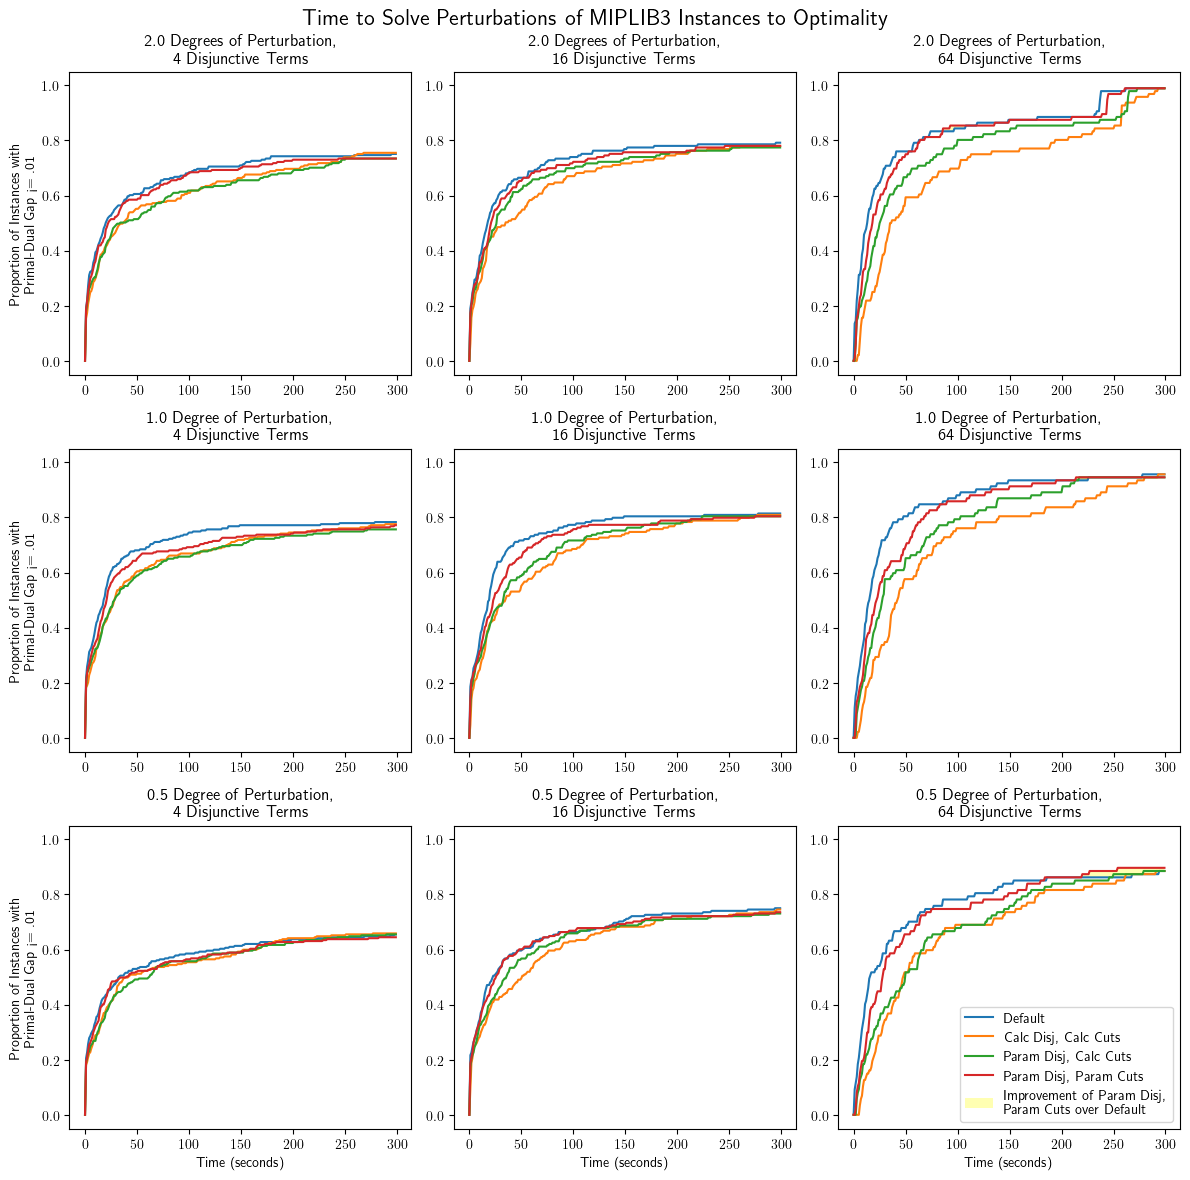

In [60]:
make_plots(time_df, "terminationTime", show_all=True)

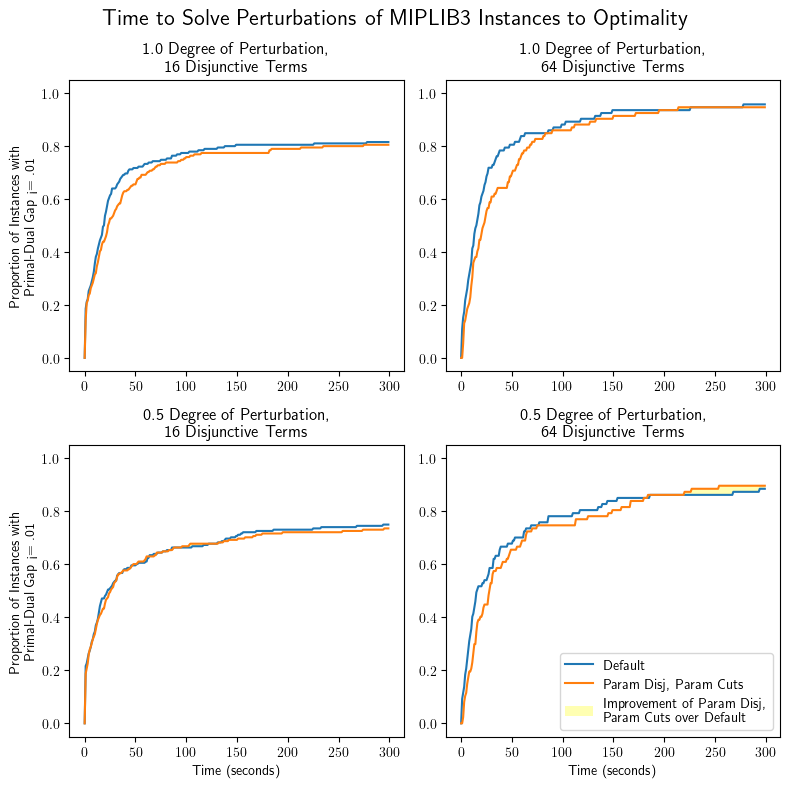

In [63]:
make_plots(time_df, "terminationTime", dim=2)

# Make node table

In [64]:
# additional filtering for dataframe on nodes processed
fields = ["nodes New", "nodes Old", "nodes Farkas",
          "nodes None"]
node_df = df.loc[mask, group_cols + id_cols + fields]
for f in fields:
    node_df[f] = node_df[f] / 1000

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = node_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "node.csv"), index=False, mode="w")
out

,degree,terms,nodes New,nodes Old,nodes Farkas,nodes None,instance,instanceIndex
0,0.5,4,13.471899,14.751432,15.598638,12.693108,19,287
1,0.5,16,9.587740,9.285389,10.397495,9.290736,18,208
2,0.5,64,10.094713,10.618138,9.427391,7.870379,10,87
3,1.0,4,9.874551,11.413951,11.529414,9.308110,23,263
4,1.0,16,8.941825,9.103149,9.708619,9.041196,17,194
5,1.0,64,8.258848,7.801935,9.029370,5.349924,12,92
6,2.0,4,11.025763,11.484469,11.724315,9.850386,24,241
7,2.0,16,9.735046,9.059665,10.131659,9.598948,18,173
8,2.0,64,8.414750,8.703583,8.465344,7.170271,13,96


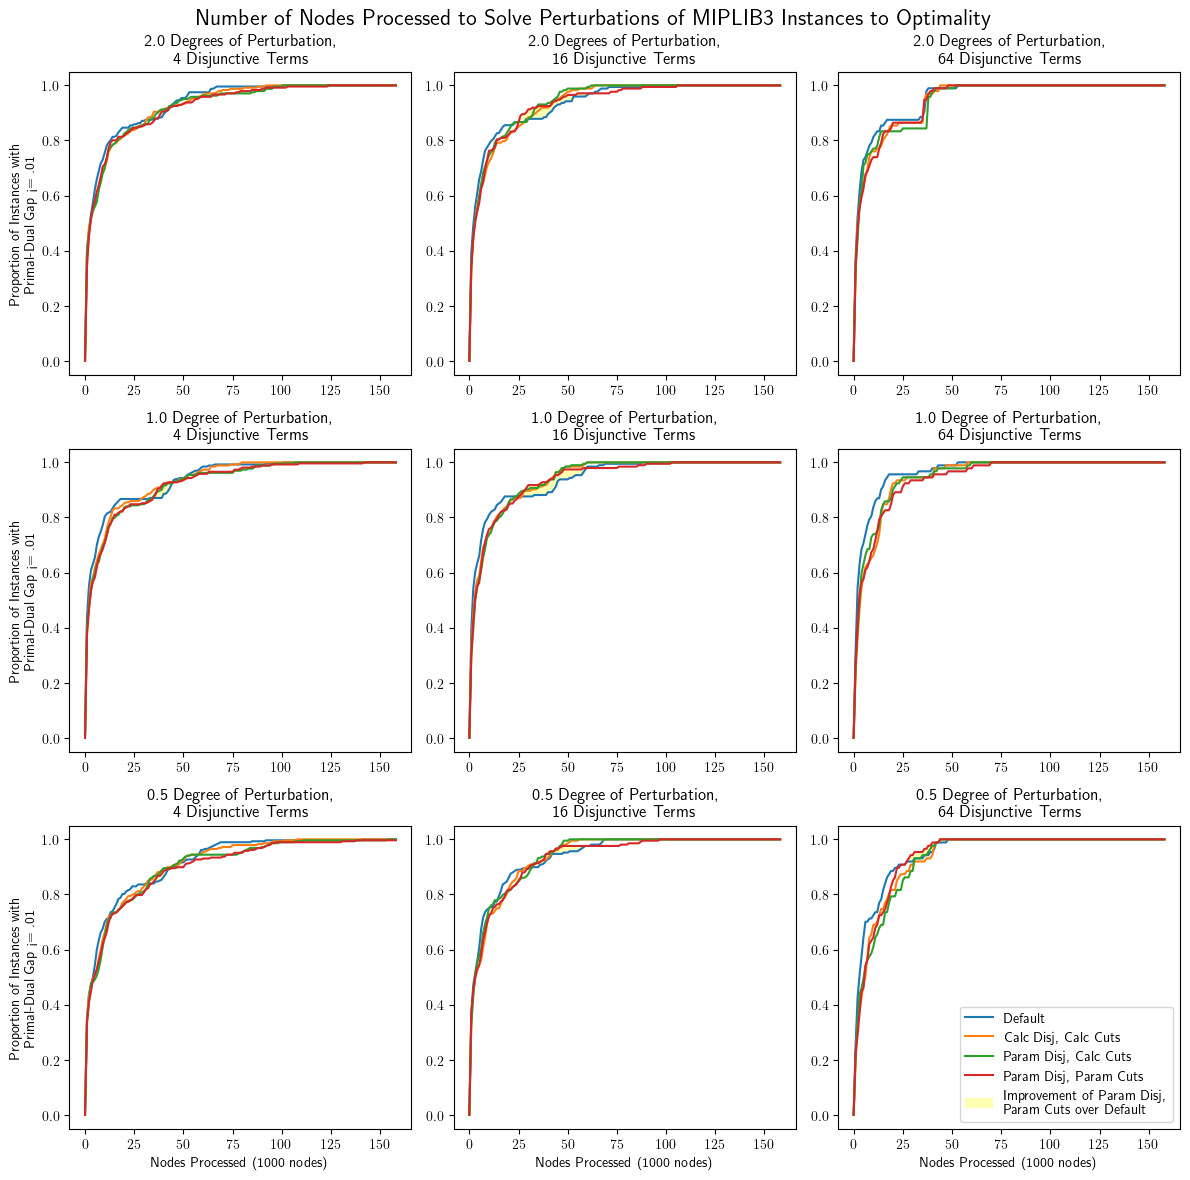

In [65]:
make_plots(node_df, "nodes", show_all=True)

# Make iteration table

In [66]:
# additional filtering for dataframe on nodes processed
fields = ["iterations New", "iterations Old",
          "iterations Farkas", "iterations None"]
iteration_df = df.loc[mask, group_cols + id_cols + fields]
for f in fields:
    iteration_df[f] = iteration_df[f] / 1000

# define aggregating operations
aggregations = {f: "mean" for f in fields}
aggregations["instance"] = "nunique"
aggregations["instanceIndex"] = "count"

# get gap closed by degree and term
out = iteration_df.groupby(["degree", "terms"]).agg(aggregations).reset_index()
out.to_csv(os.path.join(out_fldr, "iteration.csv"), index=False, mode="w")
out

,degree,terms,iterations New,iterations Old,iterations Farkas,iterations None,instance,instanceIndex
0,0.5,4,88.275599,92.994125,98.400279,94.802251,19,287
1,0.5,16,69.750611,69.583846,75.270933,76.837048,18,208
2,0.5,64,64.116000,70.387161,63.934046,64.795586,10,87
3,1.0,4,62.395008,70.477844,69.808665,63.657768,23,263
4,1.0,16,57.342015,62.765423,65.783990,61.083959,17,194
5,1.0,64,47.859804,46.522674,49.172848,41.445565,12,92
6,2.0,4,68.494606,69.502780,73.412149,72.577531,24,241
7,2.0,16,59.724948,56.185636,63.044884,64.622029,18,173
8,2.0,64,60.077365,63.047187,59.050427,58.156813,13,96


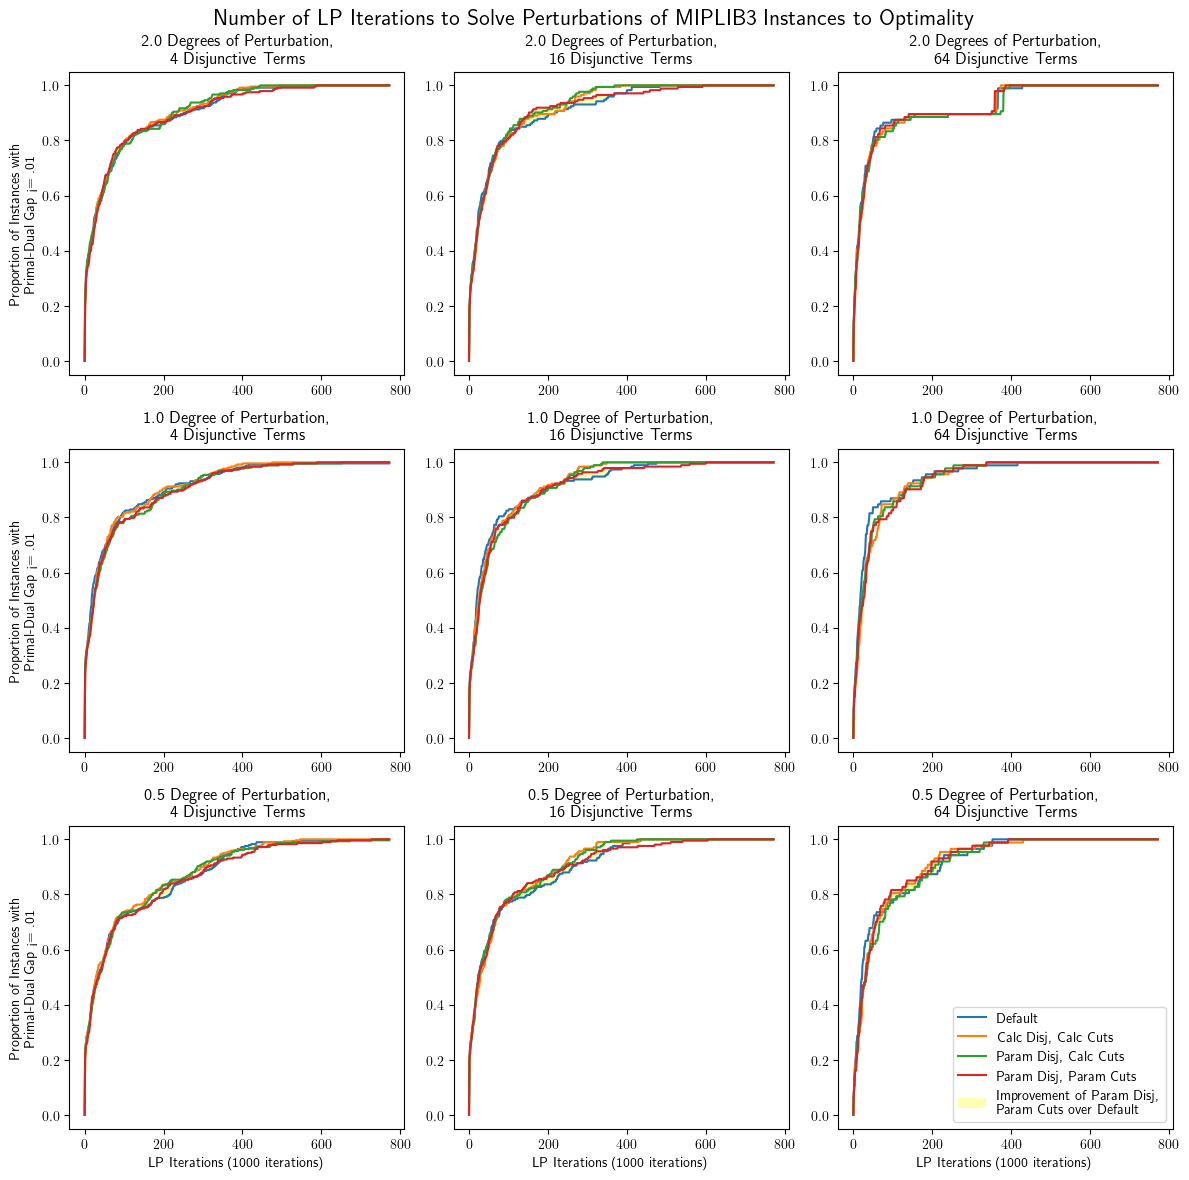

In [67]:
make_plots(iteration_df, "iterations", show_all=True)